In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = "/content/drive/MyDrive/Alzheimer_Dataset_split"
classes = ["Mild_Demented", "Moderate-Demented", "Non-Demented"]

for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)


In [ ]:
import os


print(os.path.exists("/content/drive/MyDrive/Alzheimer_PreprocessedData"))
print(os.path.exists("/content/drive/MyDrive/Alzheimer_Dataset_split"))


False
False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))


['Colab Notebooks', 'Toyota Corolla.ipynb', 'Doucoment', 'All pdf', 'DIPIKA JANA_TIU.docx', 'Untitled spreadsheet.gsheet', 'IMG20221117165206.jpg', 'IMG20221117164831.jpg', 'IMG20221117142448.jpg', 'IMG20221117165212.jpg', 'Untitled folder', 'Standard recording 24.mp3', 'oops concept.gdoc', 'DIPIKA_Resume.pdf', 'Untitled document (6).gdoc', 'NLP Documentation.gdoc', 'Adhoc Network.gdoc', 'paralal processing.gdoc', 'Untitled document (5).gdoc', 'Assignment_NLP_Dipika Jana.gdoc', 'PGCSE204A_ CRYPTOGRAPHY.gdoc', 'Software Engineering.gdoc', 'Ai Based screening system.gdoc', 'Untitled document (4).gdoc', '10marksheet.pdf', 'WhatsApp Image 2025-08-11 at 11.39.50 PM.pdf', 'WhatsApp Image 2025-01-31 at 9.09.18 AM.jpeg', 'dipikaphoto.jpeg', 'Untitled document (3).gdoc', 'DIPIKA JANA.pdf', 'DIPIKA JANA.docx', 'Untitled document (2).gdoc', 'ques.gdoc', 'Dipika_Jana.pdf', 'GIT.gdoc', 'BACKEND SKILL DOCUMENTATION.gdoc', 'Backend code Documantation.gdoc', 'Untitled document (1).gdoc', 'All PDF Make

In [ ]:
import os

base = "/content/drive/MyDrive/Alzheimer_Dataset_split"

for split in ["train", "val", "test"]:
    print(split)
    for cls in os.listdir(os.path.join(base, split)):
        count = len(os.listdir(os.path.join(base, split, cls)))
        print(f"  {cls}: {count}")


train
  Mild_Demented: 330
  Moderate-Demented: 0
  Non-Demented: 0
val
  Mild_Demented: 71
  Moderate-Demented: 0
  Non-Demented: 0
test
  Mild_Demented: 71
  Moderate-Demented: 0
  Non-Demented: 0


In [ ]:
import os
import random
import shutil

SOURCE_DIR = "/content/drive/MyDrive/Alzheimer_PreprocessedData"
DEST_DIR = "/content/drive/MyDrive/Alzheimer_Dataset_split"

random.seed(42)

for cls in os.listdir(SOURCE_DIR):
    cls_path = os.path.join(SOURCE_DIR, cls)

    if not os.path.isdir(cls_path):
        continue

    images = [f for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg','.png','.jpeg'))]

    if len(images) == 0:
        print(f"⚠️ No images in {cls}")
        continue

    random.shuffle(images)

    total = len(images)
    train_end = int(total * 0.8)
    val_end = train_end + int(total * 0.1)

    split_files = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split, files in split_files.items():
        out_dir = os.path.join(DEST_DIR, split, cls)
        os.makedirs(out_dir, exist_ok=True)

        for img in files:
            shutil.copy(
                os.path.join(cls_path, img),
                os.path.join(out_dir, img)
            )

    print(f"✅ {cls}: {total} images split")

print("🎉 SPLIT COMPLETED SUCCESSFULLY")


✅ Mild_Demented: 472 images split
⚠️ No images in Moderate_Demented
✅ Non_Demented: 1776 images split
🎉 SPLIT COMPLETED SUCCESSFULLY


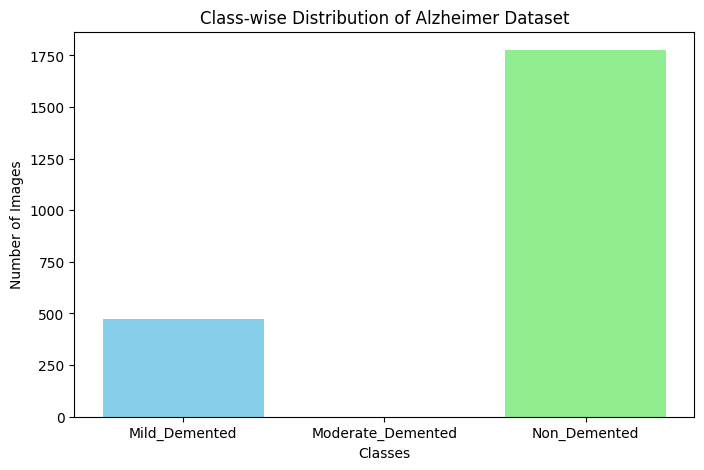

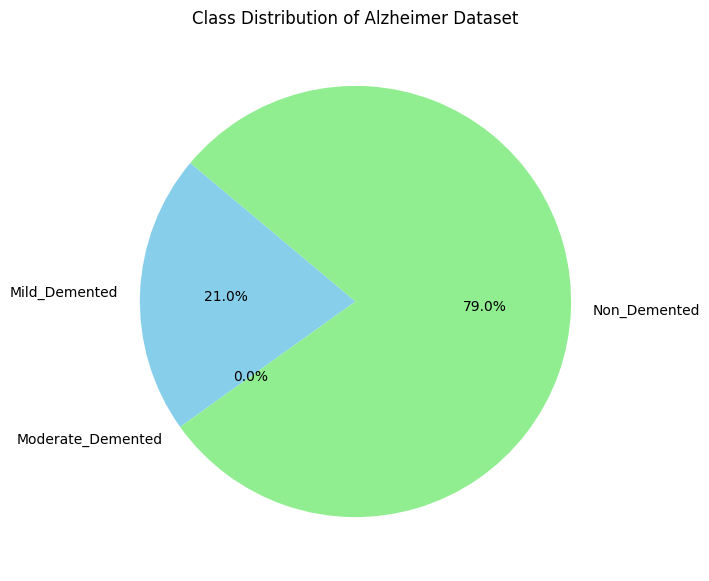

In [ ]:
import matplotlib.pyplot as plt

# Class names and number of images
classes = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented']
num_images = [472, 0, 1776]

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(classes, num_images, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class-wise Distribution of Alzheimer Dataset')
plt.show()

# Pie chart (optional)
plt.figure(figsize=(7,7))
plt.pie(num_images, labels=classes, autopct='%1.1f%%', colors=['skyblue','salmon','lightgreen'], startangle=140)
plt.title('Class Distribution of Alzheimer Dataset')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path example: '/content/drive/MyDrive/dementia_dataset/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 0: Google Drive mount (if dataset in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Set dataset paths (update your Drive path)
train_dir = "/content/drive/MyDrive/Alzheimer_Dataset_split/train"
val_dir   = "/content/drive/MyDrive/Alzheimer_Dataset_split/val"
test_dir  = "/content/drive/MyDrive/Alzheimer_Dataset_split/test"

# Step 2: Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Create Data Generators
# Train augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & Test → only rescale
val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32, class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(128,128), batch_size=32, class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir, target_size=(128,128), batch_size=32, class_mode='binary', shuffle=False
)

# Step 4: Build MobileNetV2 model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # freeze pretrained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # 2-class output

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# Step 6: Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Step 7: Save the model
model.save('Alzheimer_2class_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1797 images belonging to 2 classes.
Found 224 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.7116 - loss: 0.6764 - val_accuracy: 0.7946 - val_loss: 0.4493
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 444ms/step - accuracy: 0.7690 - loss: 0.5052 - val_accuracy: 0.8036 - val_loss: 0.4191
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 428ms/step - accuracy: 0.7810 - loss: 0.4802 - val_accuracy: 0.8036 - val_loss: 0.4080
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.8197 - loss: 0.4162 - val_accuracy: 0.8125 - val_loss: 0.3903
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 457ms/step - accuracy: 0.8196 - loss: 0.4083 - val_accuracy: 0.8170 - val_loss: 0.3804
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 463ms/step - accuracy: 0.8292 - loss: 0.3989 - val_accuracy: 0.8125 - val_loss: 0.3713
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.8434 - loss: 0.3615 - val_accuracy: 0.8125 - val_loss: 0.3712
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 440ms/step - accuracy: 0.8106 - loss: 0.3886 - val_accura

Test Accuracy: 0.8458150029182434


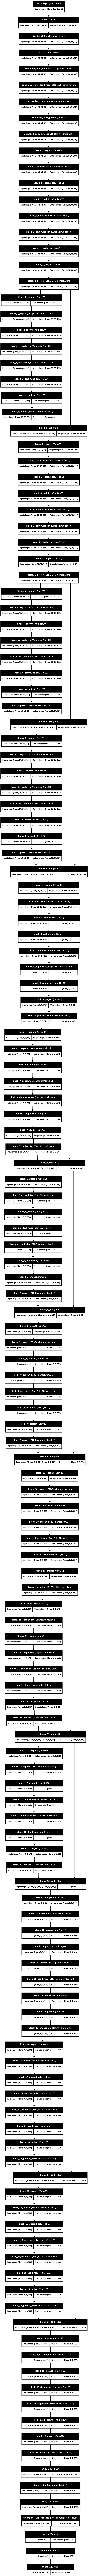

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plot the model architecture
plot_model(model,
           to_file='mobilenetv2_architecture.png',
           show_shapes=True,
           show_layer_names=True,
           expand_nested=True)

# Display the graph in Colab
Image('mobilenetv2_architecture.png')


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.8520 - loss: 0.3173 - val_accuracy: 0.8438 - val_loss: 0.3251
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.8537 - loss: 0.3352 - val_accuracy: 0.8393 - val_loss: 0.3244
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 445ms/step - accuracy: 0.8390 - loss: 0.3613 - val_accuracy: 0.8348 - val_loss: 0.3245
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.8497 - loss: 0.3441 - val_accuracy: 0.8438 - val_loss: 0.3195
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 444ms/step - accuracy: 0.8647 - loss: 0.3199 - val_accuracy: 0.8661 - val_loss: 0.3149
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 446ms/step - accuracy: 0.8404 - loss: 0.3393 - val_accuracy: 0.8616 - val_loss: 0.3158
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.8466 - loss: 0.3210 - val_accuracy: 0.8482 - val_loss: 0.3166
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 443ms/step - accuracy: 0.8700 - loss: 0.3046 - val_accu

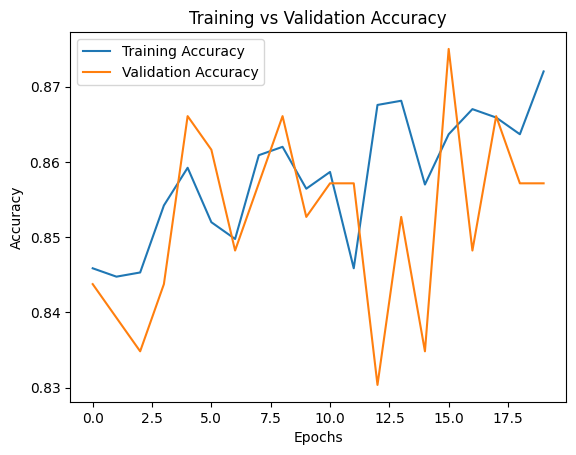

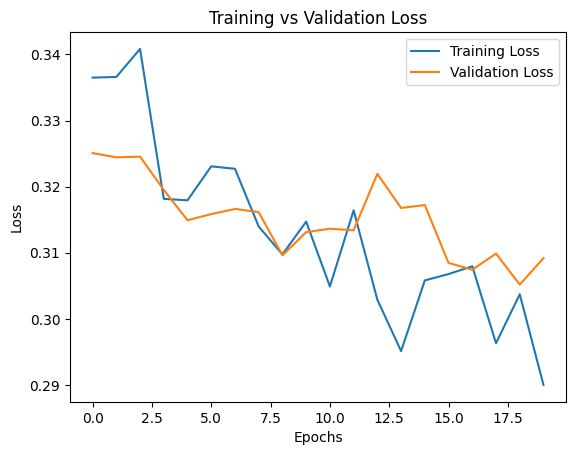

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss Curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
